## Importing Libraries

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
import warnings

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE,SelectFromModel


from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns
from sklearn.inspection import permutation_importance

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

## Loading Dataset

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("E:\DOWNLOADS\Datasets\data.csv")
data.shape  

(2000, 15)

## Exploratory Data Analysis

In [3]:
data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [4]:
# Counting Number of Attrition.
dictribution = data["Blood_Pressure_Abnormality"].value_counts()
dictribution

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

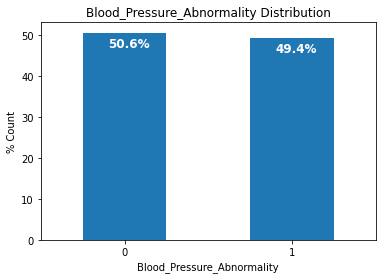

In [5]:
ax = (data['Blood_Pressure_Abnormality'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Count')
ax.set_xlabel('Blood_Pressure_Abnormality')
ax.set_ylabel('% Count')
ax.set_title('Blood_Pressure_Abnormality Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

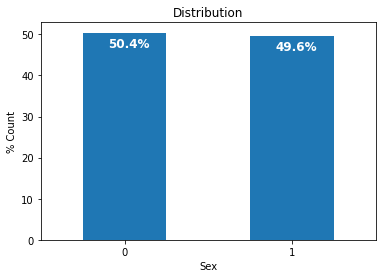

In [6]:
ax = (data['Sex'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Count')
ax.set_xlabel('Sex')
ax.set_ylabel('% Count')
ax.set_title('Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

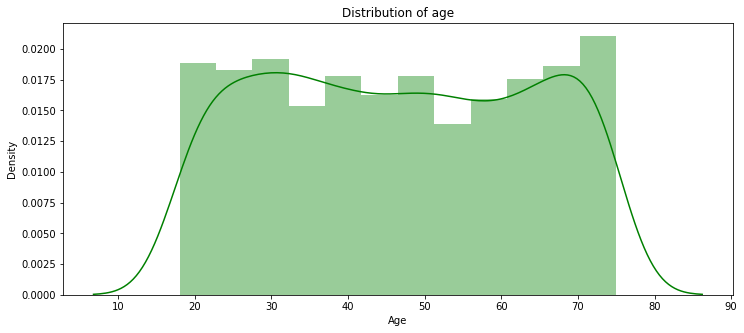

In [7]:
# Age Distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["Age"], color = 'g')

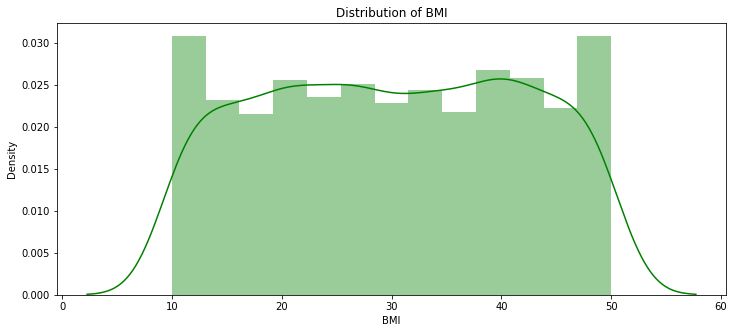

In [8]:
# Age Distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
ax = sns.distplot(data["BMI"], color = 'g')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

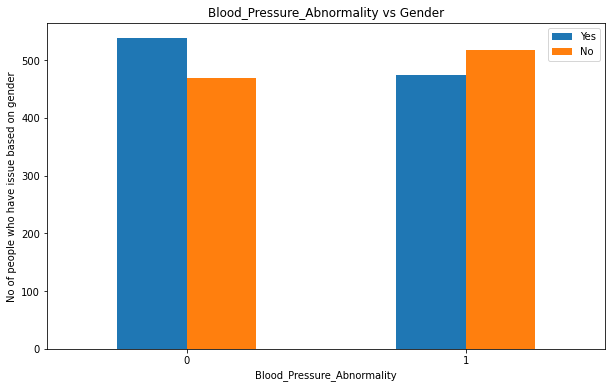

In [9]:
# Count of People left wrt Gender.
pd.crosstab(data['Sex'],data['Blood_Pressure_Abnormality']).plot(kind="bar",figsize=(10,6))
plt.title("Blood_Pressure_Abnormality vs Gender")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("No of people who have issue based on gender")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

## Data Pre-Processing

In [10]:
# Checking Shape of the dataset.
print('Length of Dataset: ', data.shape[0])
print('Number of Attributes: ', data.shape[1])

Length of Dataset:  2000
Number of Attributes:  15


In [11]:
data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [12]:
# Checking Null values in all features.
data.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [13]:
#Solving for Null Values and adding 0 in null spaces.
data['Pregnancy'] = data['Pregnancy'].fillna(0)
data['alcohol_consumption_per_day'] = data['alcohol_consumption_per_day'].fillna(0)

In [14]:
data['Blood_Pressure_Abnormality'].value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

In [15]:
# Checking Null Values again.
data.isnull().sum()

Patient_Number                    0
Blood_Pressure_Abnormality        0
Level_of_Hemoglobin               0
Genetic_Pedigree_Coefficient     92
Age                               0
BMI                               0
Sex                               0
Pregnancy                         0
Smoking                           0
Physical_activity                 0
salt_content_in_the_diet          0
alcohol_consumption_per_day       0
Level_of_Stress                   0
Chronic_kidney_disease            0
Adrenal_and_thyroid_disorders     0
dtype: int64

In [16]:
# Computing Mean of every column.
columns_means = data.mean()
print(columns_means)

Patient_Number                    1000.500000
Blood_Pressure_Abnormality           0.493500
Level_of_Hemoglobin                 11.710035
Genetic_Pedigree_Coefficient         0.494817
Age                                 46.558500
BMI                                 30.081500
Sex                                  0.496000
Pregnancy                            0.099500
Smoking                              0.509500
Physical_activity                25254.424500
salt_content_in_the_diet         24926.097000
alcohol_consumption_per_day        220.636500
Level_of_Stress                      2.012500
Chronic_kidney_disease               0.505000
Adrenal_and_thyroid_disorders        0.443500
dtype: float64


In [17]:
# Adding mean value in null spaces of column Genetic Preigree.
data['Genetic_Pedigree_Coefficient'] = data['Genetic_Pedigree_Coefficient'].fillna(0.49)

In [18]:
# Again Checking Null Values.
data.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [19]:
# Checking Data Types of every column.
data.dtypes

Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

In [20]:
# Checking amount of classes in target variable.
data.Blood_Pressure_Abnormality.value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

In [21]:
# Dropping Unnecessary Column.
data.drop('Patient_Number',axis=1,inplace=True)

## Train - Test Split.

In [22]:
X = data.loc[:, data.columns != 'Blood_Pressure_Abnormality']     # All columns except target variable.
y = data[['Blood_Pressure_Abnormality']]                          # Target Variable.

In [23]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(1400, 13)
(1400, 1)
(600, 13)
(600, 1)


In [24]:
features = trainX.columns
print(features)

Index(['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI',
       'Sex', 'Pregnancy', 'Smoking', 'Physical_activity',
       'salt_content_in_the_diet', 'alcohol_consumption_per_day',
       'Level_of_Stress', 'Chronic_kidney_disease',
       'Adrenal_and_thyroid_disorders'],
      dtype='object')


## Applying Machine Learning Models

### Logistic Regression

[0.76428571 0.72142857 0.75       0.71428571 0.7        0.73571429
 0.78571429 0.69285714 0.69285714 0.67142857]
Accuracy Logistic Regression KFold with k=10: 72.29%
[[520 199]
 [184 497]]


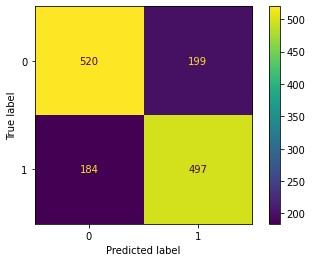

In [25]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

lr = LogisticRegression(solver='liblinear',random_state=2)
results_kfold = cross_val_score(lr, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy Logistic Regression KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(lr, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [26]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(trainX,trainy.values.ravel())
y_pred = lr.predict(testX)

Confusion Matrix:
[[201  93]
 [ 96 210]]
------------------------------------
AUC Score: 0.6849739895958382
------------------------------------
Accuracy of Logistic Regression: 68.5 %
------------------------------------
Recall: 0.6862745098039216
------------------------------------
Precision: 0.693069306930693
------------------------------------
Specificity: 0.6836734693877551
------------------------------------
Sensitivity: 0.6862745098039216
------------------------------------
Miss Rate (False Positive Rate): 0.3163265306122449
------------------------------------
Miss Rate (False Negative Rate): 0.3137254901960784
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       294
           1       0.69      0.69      0.69       306

    accuracy                           0.69       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.69      0.69      0.69       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

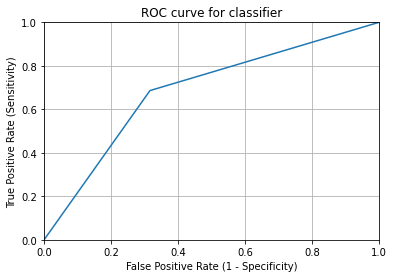

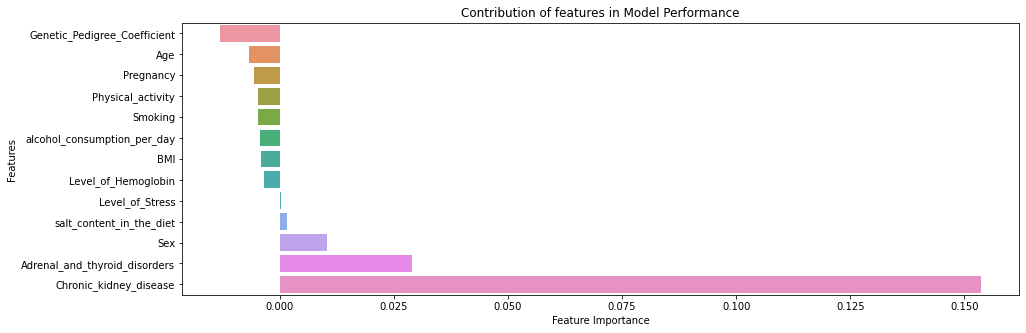

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = lr.score(testX, testy)
print("Accuracy of Logistic Regression:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))

from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


perm_importance = permutation_importance(lr, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### XGBOOST Classififer

[0.90714286 0.88571429 0.87142857 0.87142857 0.87142857 0.84285714
 0.89285714 0.85714286 0.82857143 0.89285714]
Accuracy of XGBOOST KFold with k=10: 87.21%
[[621  98]
 [ 98 583]]


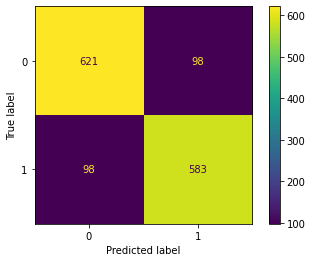

In [28]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)
results_kfold = cross_val_score(xgb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of XGBOOST KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(xgb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [29]:
xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)
xgb.fit(trainX,trainy.values.ravel())
y_pred = xgb.predict(testX)

Confusion Matrix:
[[275  19]
 [ 40 266]]
------------------------------------
AUC Score: 0.9023275977057491
------------------------------------
Accuracy of XGBOOST: 90.16666666666666 %
------------------------------------
Recall: 0.869281045751634
------------------------------------
Precision: 0.9333333333333333
------------------------------------
Specificity: 0.935374149659864
------------------------------------
Sensitivity: 0.869281045751634
------------------------------------
Miss Rate (False Positive Rate): 0.06462585034013606
------------------------------------
Miss Rate (False Negative Rate): 0.13071895424836602


Text(0.5, 1.0, 'Contribution of features in Model Performance')

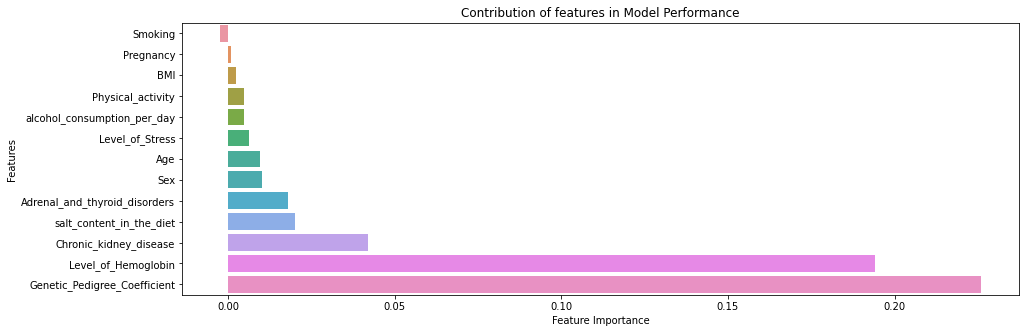

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = xgb.score(testX, testy)
print("Accuracy of XGBOOST:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


perm_importance = permutation_importance(xgb, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       294
           1       0.93      0.87      0.90       306

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



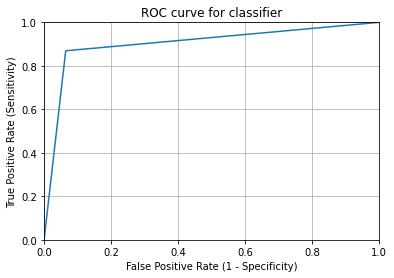

In [31]:
from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))



from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### KNN Classifier

[0.45       0.58571429 0.57857143 0.52857143 0.53571429 0.5
 0.5        0.53571429 0.55714286 0.55      ]
Accuracy of KNN KFold with k=10: 53.21%
[[406 313]
 [359 322]]


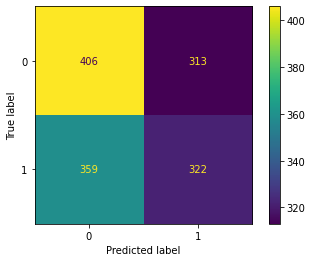

In [32]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5)
results_kfold = cross_val_score(knn, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of KNN KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(knn, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [33]:
#Note: .values.ravel( ) is used to eliminate dataconversion warning.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainX,trainy.values.ravel())
y_pred = knn.predict(testX)

Confusion Matrix:
[[161 133]
 [172 134]]
------------------------------------
AUC Score: 0.49276377217553696
------------------------------------
Accuracy of KNN Classifier: 49.166666666666664 %
------------------------------------
Recall: 0.43790849673202614
------------------------------------
Precision: 0.50187265917603
------------------------------------
Specificity: 0.5476190476190477
------------------------------------
Sensitivity: 0.43790849673202614
------------------------------------
Miss Rate (False Positive Rate): 0.4523809523809524
------------------------------------
Miss Rate (False Negative Rate): 0.5620915032679739


Text(0.5, 1.0, 'Contribution of features in Model Performance')

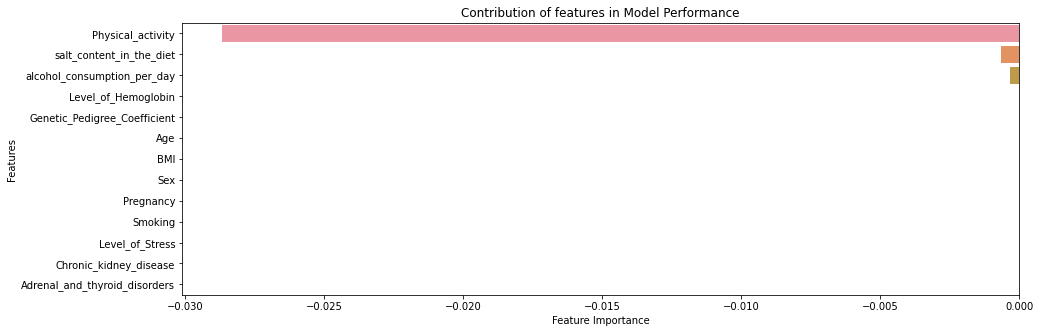

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = knn.score(testX, testy)
print("Accuracy of KNN Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


perm_importance = permutation_importance(knn, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

              precision    recall  f1-score   support

           0       0.48      0.55      0.51       294
           1       0.50      0.44      0.47       306

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600



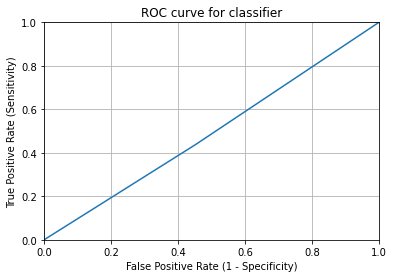

In [35]:
from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))



from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Decision Tree Classifier

[0.84285714 0.77142857 0.85       0.81428571 0.87142857 0.85
 0.87142857 0.84285714 0.82857143 0.85714286]
Accuracy of DECISION TREE KFold with k=10: 84.00%
[[612 107]
 [108 573]]


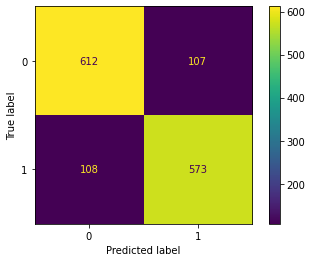

In [36]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

DT = DecisionTreeClassifier(max_depth=200)
results_kfold = cross_val_score(DT, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of DECISION TREE KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(DT, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [37]:
DT = DecisionTreeClassifier(max_depth=200)
DT.fit(trainX,trainy)
y_pred = DT.predict(testX) 

Confusion Matrix:
[[247  47]
 [ 49 257]]
------------------------------------
AUC Score: 0.8400026677337602
------------------------------------
Accuracy of Decision Tree: 84.0 %
------------------------------------
Recall: 0.8398692810457516
------------------------------------
Precision: 0.8453947368421053
------------------------------------
Specificity: 0.8401360544217688
------------------------------------
Sensitivity: 0.8398692810457516
------------------------------------
Miss Rate (False Positive Rate): 0.1598639455782313
------------------------------------
Miss Rate (False Negative Rate): 0.16013071895424835


Text(0.5, 1.0, 'Contribution of features in Model Performance')

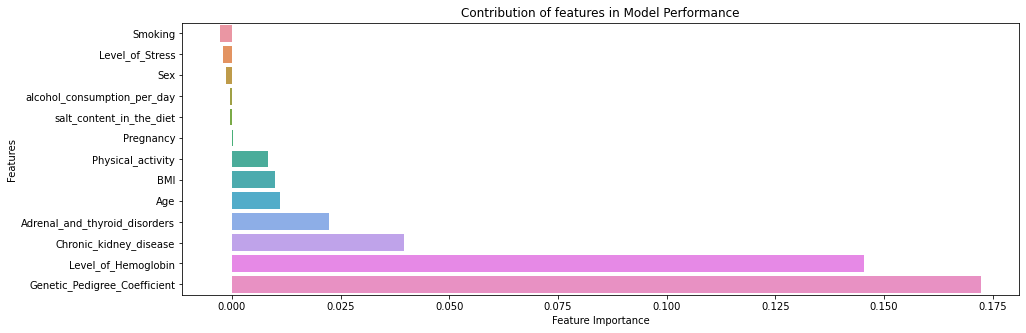

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

perm_importance = permutation_importance(DT, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       294
           1       0.85      0.84      0.84       306

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



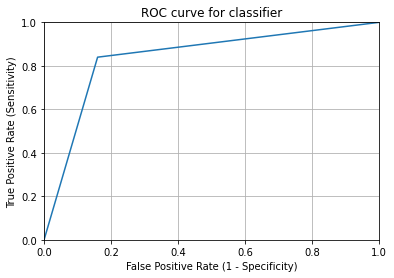

In [39]:
from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))



from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Random Forest Classifier

[0.88571429 0.9        0.87142857 0.89285714 0.87857143 0.88571429
 0.9        0.89285714 0.81428571 0.92857143]
Accuracy of Random Forest KFold with k=10: 88.50%
[[622  97]
 [ 70 611]]


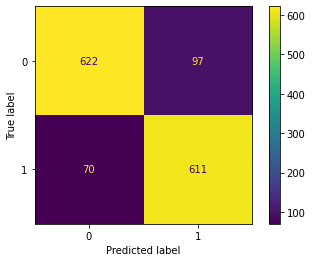

In [40]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
results_kfold = cross_val_score(rf, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Random Forest KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(rf, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [41]:
rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[264  30]
 [ 35 271]]
------------------------------------
AUC Score: 0.8917900493530745
------------------------------------
Accuracy of Random Forest: 89.16666666666667 %
------------------------------------
Recall: 0.8856209150326797
------------------------------------
Precision: 0.9003322259136213
------------------------------------
Specificity: 0.8979591836734694
------------------------------------
Sensitivity: 0.8856209150326797
------------------------------------
Miss Rate (False Positive Rate): 0.10204081632653061
------------------------------------
Miss Rate (False Negative Rate): 0.11437908496732026
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       294
           1       0.90      0.89      0.89       306

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

Features which are contributing 

Text(0.5, 1.0, 'Contribution of features in Model Performance')

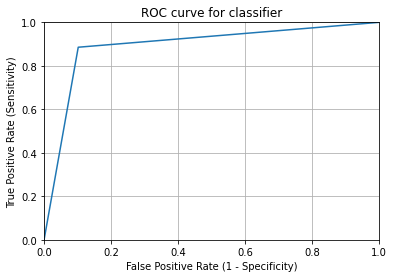

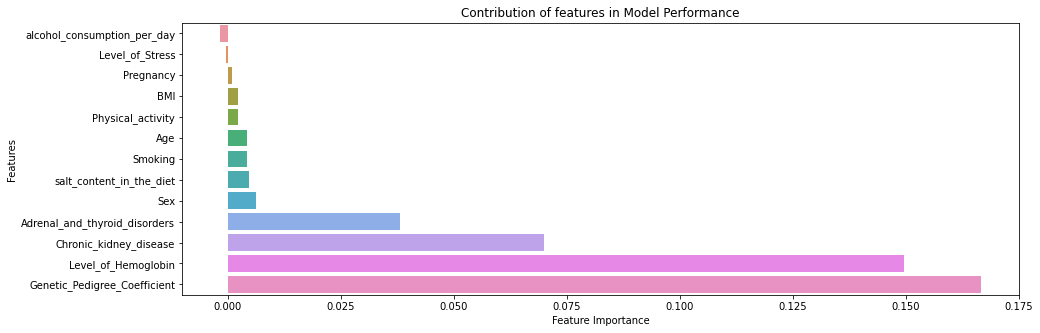

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)



print("Features which are contributing in Model")
perm_importance = permutation_importance(rf, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Naive Bayes Classifier

[0.82142857 0.71428571 0.76428571 0.75       0.77142857 0.81428571
 0.81428571 0.82142857 0.70714286 0.78571429]
Accuracy of Naive Bayes KFold with k=10: 77.64%
[[629  90]
 [221 460]]


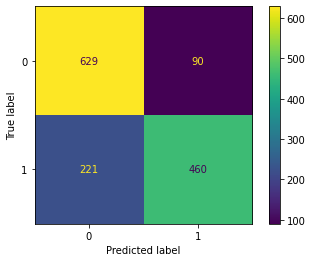

In [43]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

NB = GaussianNB()
results_kfold = cross_val_score(NB, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Naive Bayes KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(NB, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [44]:
NB = GaussianNB()
NB.fit(trainX,trainy.values.ravel())
y_pred = NB.predict(testX)

Confusion Matrix:
[[262  32]
 [113 193]]
------------------------------------
AUC Score: 0.7609377084166999
------------------------------------
Accuracy of Naive Bayes: 75.83333333333333 %
------------------------------------
Recall: 0.630718954248366
------------------------------------
Precision: 0.8577777777777778
------------------------------------
Specificity: 0.891156462585034
------------------------------------
Sensitivity: 0.630718954248366
------------------------------------
Miss Rate (False Positive Rate): 0.10884353741496598
------------------------------------
Miss Rate (False Negative Rate): 0.369281045751634


Text(0.5, 1.0, 'Contribution of features in Model Performance')

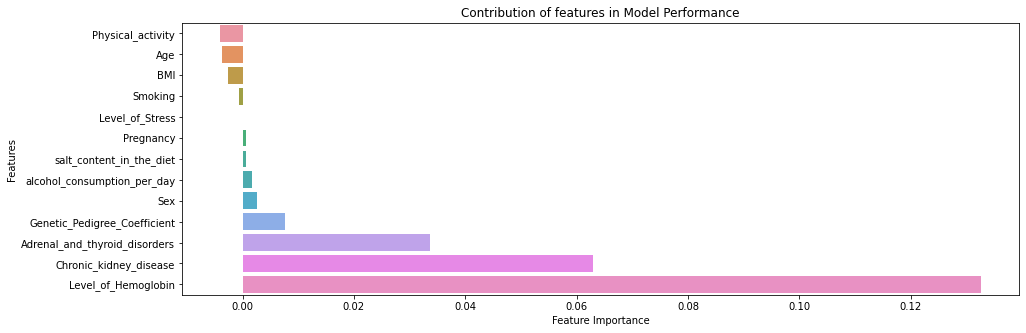

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = NB.score(testX, testy)
print("Accuracy of Naive Bayes:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


perm_importance = permutation_importance(NB, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       294
           1       0.86      0.63      0.73       306

    accuracy                           0.76       600
   macro avg       0.78      0.76      0.76       600
weighted avg       0.78      0.76      0.75       600



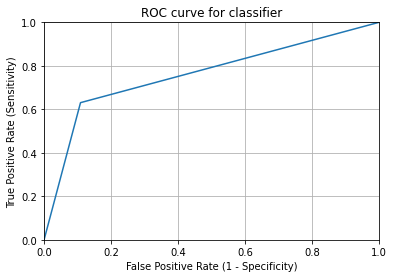

In [46]:
from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))



from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Gradient Boosting Classifier

[0.89285714 0.89285714 0.86428571 0.90714286 0.86428571 0.87857143
 0.88571429 0.91428571 0.86428571 0.91428571]
Accuracy of Gradient Boosting KFold with k=10: 88.79%
[[633  86]
 [ 74 607]]


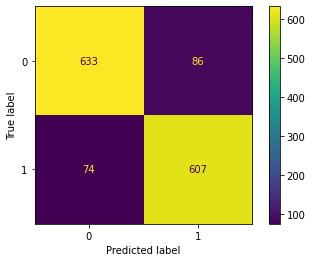

In [47]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
results_kfold = cross_val_score(gb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Gradient Boosting KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(gb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [48]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

Confusion Matrix:
[[271  23]
 [ 40 266]]
------------------------------------
AUC Score: 0.8955248766173136
------------------------------------
Accuracy of Random Forest: 89.5 %
------------------------------------
Recall: 0.869281045751634
------------------------------------
Precision: 0.9204152249134948
------------------------------------
Specificity: 0.9217687074829932
------------------------------------
Sensitivity: 0.869281045751634
------------------------------------
Miss Rate (False Positive Rate): 0.0782312925170068
------------------------------------
Miss Rate (False Negative Rate): 0.13071895424836602
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       294
           1       0.92      0.87      0.89       306

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.89       600
weighted avg       0.90      0.90      0.89       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

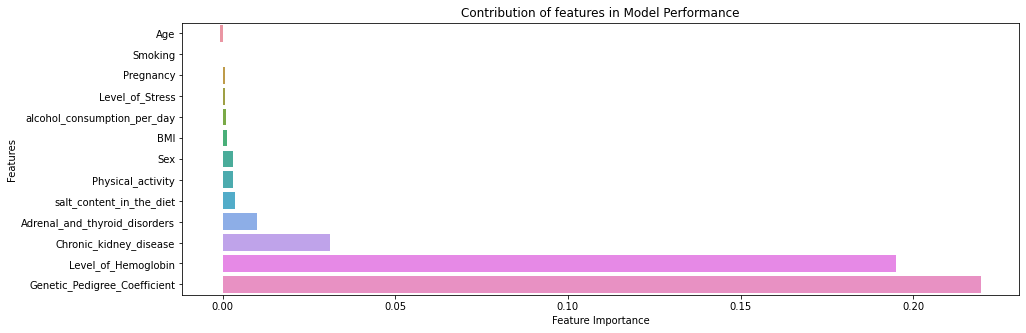

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

perm_importance = permutation_importance(gb, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Voting Classifier

In [50]:
r0 = GradientBoostingClassifier(learning_rate = 0.01,max_depth=5,n_estimators=400)
r1 = RandomForestClassifier(max_depth=10,n_estimators = 1200)
r2 = XGBClassifier(learning_rate = 0.85, max_depth = 2)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

Confusion Matrix:
[[274  20]
 [ 33 273]]
------------------------------------
AUC Score: 0.9120648259303722
------------------------------------
Accuracy of Voting Classifier: 91.16666666666666 %
------------------------------------
Recall: 0.8921568627450981
------------------------------------
Precision: 0.931740614334471
------------------------------------
Specificity: 0.9319727891156463
------------------------------------
Sensitivity: 0.8921568627450981
------------------------------------
Miss Rate (False Positive Rate): 0.06802721088435375
------------------------------------
Miss Rate (False Negative Rate): 0.10784313725490197
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       294
           1       0.92      0.87      0.89       306

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.89       600
weighted avg       0.90      0.90      0.89       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

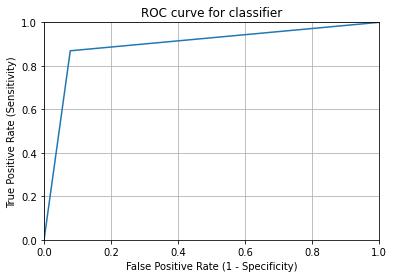

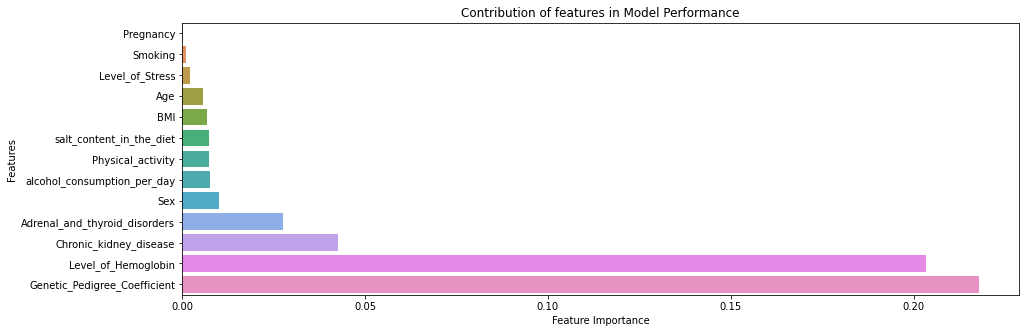

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred_voting)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred_voting)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred_voting)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred_voting)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(voting, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

## Feature Selection Using Lasso Regularization

In [52]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [53]:
features = trainX.columns
print(features)

Index(['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI',
       'Sex', 'Pregnancy', 'Smoking', 'Physical_activity',
       'salt_content_in_the_diet', 'alcohol_consumption_per_day',
       'Level_of_Stress', 'Chronic_kidney_disease',
       'Adrenal_and_thyroid_disorders'],
      dtype='object')


In [54]:
# apply the Lasso Model on this Dataset
lasso = Lasso(alpha=0.1)
lasso.fit(trainX,trainy)

Lasso(alpha=0.1)

In [55]:
coeff = lasso.coef_
coeff

array([ 1.08434447e-02, -0.00000000e+00, -1.30081600e-03,  4.91945687e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.49862849e-06,
        5.84781854e-07, -1.13467828e-06,  0.00000000e+00,  4.59648438e-02,
        0.00000000e+00])

In [56]:
df_coeff = pd.DataFrame({"features":features,"coeff":coeff})
df_coeff.sort_values("coeff")

,features,coeff
2,Age,-1.300816e-03
9,alcohol_consumption_per_day,-1.134678e-06
1,Genetic_Pedigree_Coefficient,-0.000000e+00
4,Sex,0.000000e+00
5,Pregnancy,0.000000e+00
6,Smoking,0.000000e+00
10,Level_of_Stress,0.000000e+00
12,Adrenal_and_thyroid_disorders,0.000000e+00
8,salt_content_in_the_diet,5.847819e-07
7,Physical_activity,1.498628e-06


Now we are dropping all the features whose coefficient value shrink to 0 and selection only those features which are non-zero, regardless of positive and negative.

## Applying Machine Learning Models After Lasso Feature Selection

In [57]:
X = data[['Chronic_kidney_disease','Age','alcohol_consumption_per_day','salt_content_in_the_diet','Physical_activity','BMI','Level_of_Hemoglobin']]   # Adding only important features in X variable.
y = data[['Blood_Pressure_Abnormality']]                               # Adding Target Column in Y.

In [58]:
# Train - Test Splitting dataset with 70-30% ratio.
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(1400, 7)
(1400, 1)
(600, 7)
(600, 1)


In [59]:
features = trainX.columns
print(features)

Index(['Chronic_kidney_disease', 'Age', 'alcohol_consumption_per_day',
       'salt_content_in_the_diet', 'Physical_activity', 'BMI',
       'Level_of_Hemoglobin'],
      dtype='object')


### Logistic Regression (After Lasso Regularization)

[0.72857143 0.7        0.74285714 0.7        0.72857143 0.77142857
 0.77142857 0.69285714 0.68571429 0.73571429]
Accuracy Logistic Regression KFold with k=10: 72.57%
[[516 203]
 [181 500]]


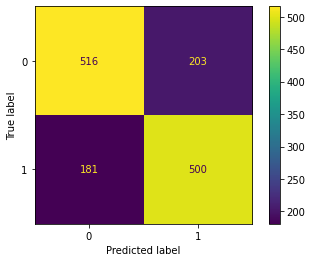

In [60]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

lr = LogisticRegression(solver='liblinear',random_state=2)
results_kfold = cross_val_score(lr, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy Logistic Regression KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(lr, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [61]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(trainX,trainy.values.ravel())
y_pred = lr.predict(testX)

Confusion Matrix:
[[200  94]
 [ 93 213]]
------------------------------------
AUC Score: 0.6881752701080431
------------------------------------
Accuracy of Logistic Regression: 68.83333333333333 %
------------------------------------
Recall: 0.696078431372549
------------------------------------
Precision: 0.6938110749185668
------------------------------------
Specificity: 0.6802721088435374
------------------------------------
Sensitivity: 0.696078431372549
------------------------------------
Miss Rate (False Positive Rate): 0.3197278911564626
------------------------------------
Miss Rate (False Negative Rate): 0.30392156862745096
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       294
           1       0.69      0.70      0.69       306

    accuracy                           0.69       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.69      0.69      0.69       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

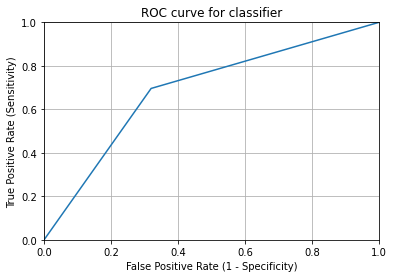

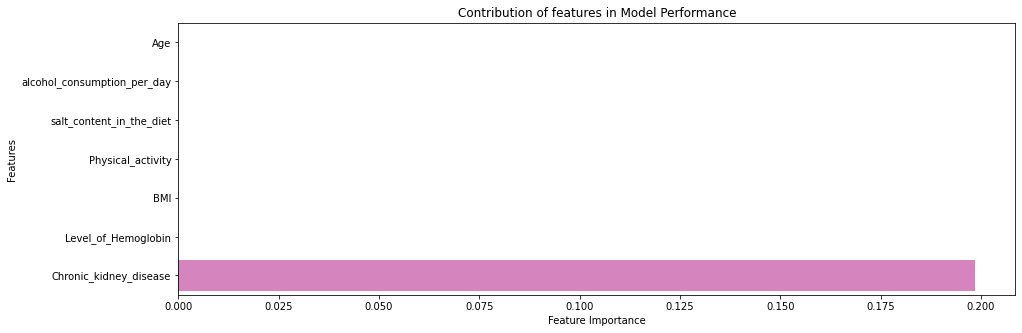

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = lr.score(testX, testy)
print("Accuracy of Logistic Regression:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


perm_importance = permutation_importance(lr, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Random Forest Classifier (After Lasso)

[0.8        0.75       0.74285714 0.76428571 0.77857143 0.76428571
 0.77857143 0.73571429 0.68571429 0.76428571]
Accuracy of Random Forest KFold with k=10: 75.64%
[[523 196]
 [143 538]]


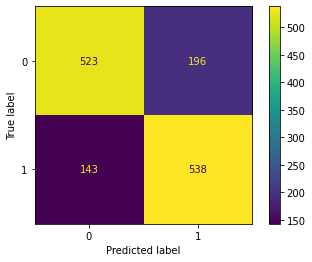

In [63]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
results_kfold = cross_val_score(rf, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Random Forest KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(rf, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [64]:
rf = RandomForestClassifier(max_depth=5,n_estimators = 700)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[197  97]
 [ 56 250]]
------------------------------------
AUC Score: 0.7435307456315859
------------------------------------
Accuracy of Random Forest: 74.5 %
------------------------------------
Recall: 0.8169934640522876
------------------------------------
Precision: 0.7204610951008645
------------------------------------
Specificity: 0.6700680272108843
------------------------------------
Sensitivity: 0.8169934640522876
------------------------------------
Miss Rate (False Positive Rate): 0.3299319727891156
------------------------------------
Miss Rate (False Negative Rate): 0.1830065359477124
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       294
           1       0.72      0.82      0.77       306

    accuracy                           0.74       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.75      0.74      0.74       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

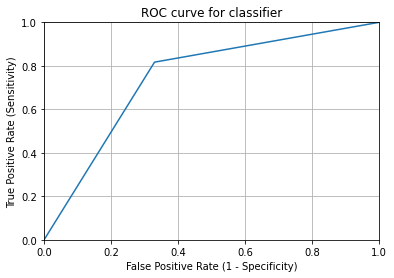

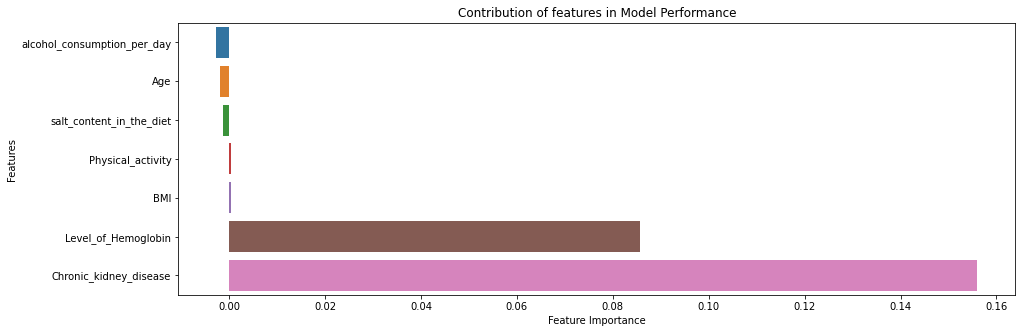

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX,testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(rf, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### XGBOOST Classifier (After Lasso)

[0.77857143 0.70714286 0.69285714 0.70714286 0.73571429 0.72142857
 0.77142857 0.7        0.67142857 0.67857143]
Accuracy of XGBOOST KFold with k=10: 71.64%
[[554 165]
 [213 468]]


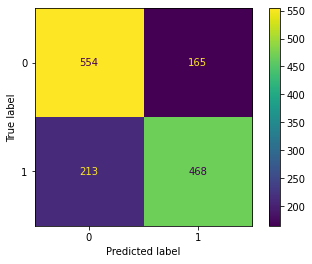

In [66]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)
results_kfold = cross_val_score(xgb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of XGBOOST KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(xgb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [67]:
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 2)
xgb.fit(trainX,trainy.values.ravel())
y_pred = xgb.predict(testX)

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = xgb.score(testX, testy)
print("Accuracy of XGBOOST:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

Confusion Matrix:
[[196  98]
 [ 53 253]]
------------------------------------
AUC Score: 0.7467320261437909
------------------------------------
Accuracy of XGBOOST: 74.83333333333333 %
------------------------------------
Recall: 0.826797385620915
------------------------------------
Precision: 0.7207977207977208
------------------------------------
Specificity: 0.6666666666666666
------------------------------------
Sensitivity: 0.826797385620915
------------------------------------
Miss Rate (False Positive Rate): 0.3333333333333333
------------------------------------
Miss Rate (False Negative Rate): 0.17320261437908496


Text(0.5, 1.0, 'Contribution of features in Model Performance')

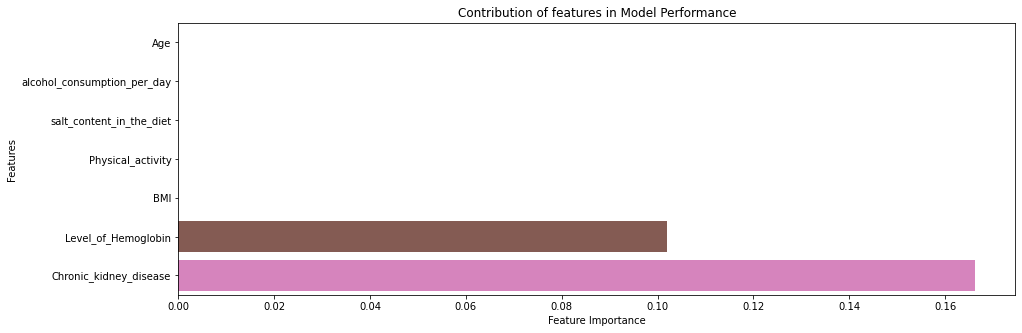

In [69]:
perm_importance = permutation_importance(xgb, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       294
           1       0.72      0.83      0.77       306

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.75      0.75      0.75       600



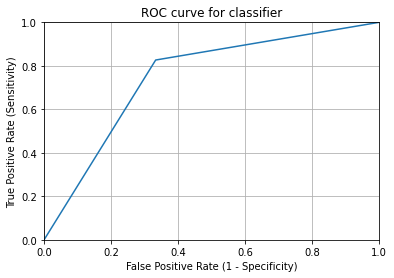

In [70]:
from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))



from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Decision Tree Classifier (After Lasso)

[0.67857143 0.71428571 0.68571429 0.65714286 0.67142857 0.75
 0.72857143 0.65       0.68571429 0.64285714]
Accuracy of DECISION TREE KFold with k=10: 68.64%
[[499 220]
 [225 456]]


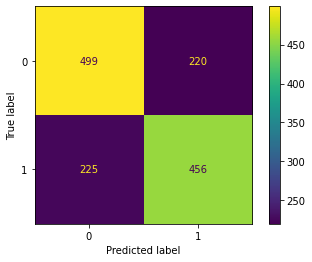

In [71]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

DT = DecisionTreeClassifier(max_depth=200)
results_kfold = cross_val_score(DT, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of DECISION TREE KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(DT, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [72]:
DT = DecisionTreeClassifier(max_depth=1000)
DT.fit(trainX,trainy)
y_pred = DT.predict(testX) 

Confusion Matrix:
[[200  94]
 [ 90 216]]
------------------------------------
AUC Score: 0.693077230892357
------------------------------------
Accuracy of Decision Tree: 69.33333333333334 %
------------------------------------
Recall: 0.7058823529411765
------------------------------------
Precision: 0.6967741935483871
------------------------------------
Specificity: 0.6802721088435374
------------------------------------
Sensitivity: 0.7058823529411765
------------------------------------
Miss Rate (False Positive Rate): 0.3197278911564626
------------------------------------
Miss Rate (False Negative Rate): 0.29411764705882354


Text(0.5, 1.0, 'Contribution of features in Model Performance')

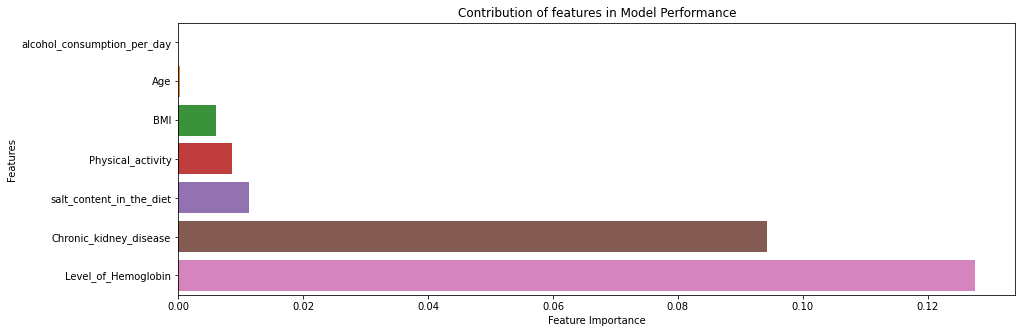

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

perm_importance = permutation_importance(DT, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       294
           1       0.70      0.71      0.70       306

    accuracy                           0.69       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.69      0.69      0.69       600



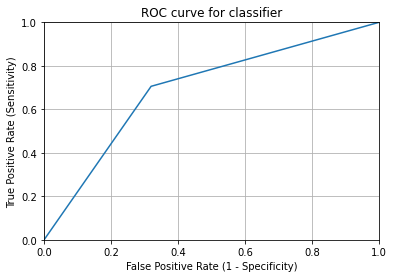

In [74]:
from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))



from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### KNN Classifier (After Lasso)

[0.45       0.58571429 0.57857143 0.52857143 0.53571429 0.5
 0.5        0.53571429 0.55714286 0.55      ]
Accuracy of KNN KFold with k=10: 53.21%
[[406 313]
 [359 322]]


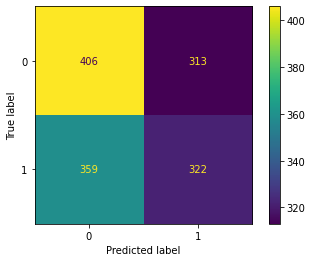

In [75]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5)
results_kfold = cross_val_score(knn, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of KNN KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(knn, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [76]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(trainX,trainy.values.ravel())
y_pred = knn.predict(testX)

Confusion Matrix:
[[174 120]
 [176 130]]
------------------------------------
AUC Score: 0.5083366680005336
------------------------------------
Accuracy of KNN Classifier: 50.66666666666667 %
------------------------------------
Recall: 0.42483660130718953
------------------------------------
Precision: 0.52
------------------------------------
Specificity: 0.5918367346938775
------------------------------------
Sensitivity: 0.42483660130718953
------------------------------------
Miss Rate (False Positive Rate): 0.40816326530612246
------------------------------------
Miss Rate (False Negative Rate): 0.5751633986928104
              precision    recall  f1-score   support

           0       0.50      0.59      0.54       294
           1       0.52      0.42      0.47       306

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.50       600
weighted avg       0.51      0.51      0.50       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

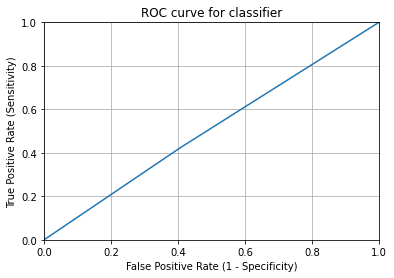

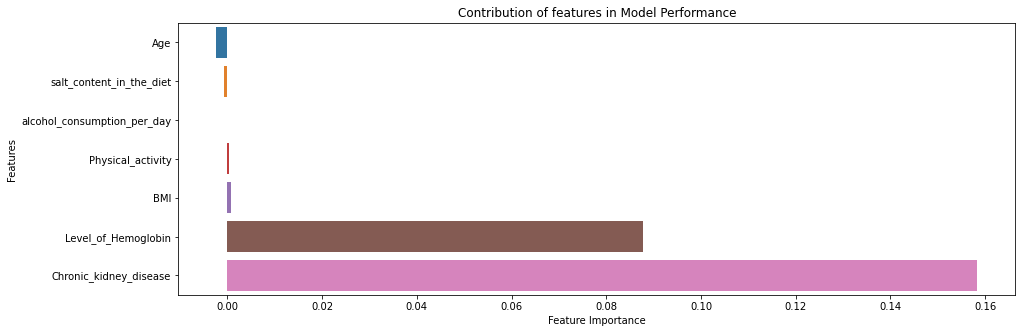

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = knn.score(testX, testy)
print("Accuracy of KNN Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


print(classification_report(testy,y_pred))

miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(rf, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Naive Bayes (After Lasso)

[0.75714286 0.69285714 0.78571429 0.72857143 0.75714286 0.72857143
 0.76428571 0.72857143 0.68571429 0.68571429]
Accuracy of Naive Bayes KFold with k=10: 73.14%
[[583 136]
 [243 438]]


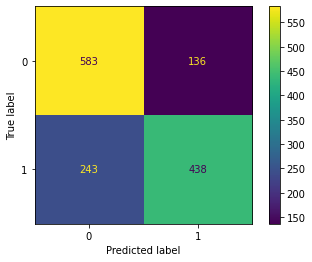

In [78]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

NB = GaussianNB()
results_kfold = cross_val_score(NB, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Naive Bayes KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(NB, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [79]:
NB = GaussianNB()
NB.fit(trainX,trainy.values.ravel())
y_pred = NB.predict(testX)

Confusion Matrix:
[[245  49]
 [113 193]]
------------------------------------
AUC Score: 0.7320261437908497
------------------------------------
Accuracy of Naive Bayes: 73.0 %
------------------------------------
Recall: 0.630718954248366
------------------------------------
Precision: 0.7975206611570248
------------------------------------
Specificity: 0.8333333333333334
------------------------------------
Sensitivity: 0.630718954248366
------------------------------------
Miss Rate (False Positive Rate): 0.16666666666666666
------------------------------------
Miss Rate (False Negative Rate): 0.369281045751634
------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       294
           1       0.80      0.63      0.70       306

    accuracy                           0.73       600
   macro avg       0.74      0.73      0.73       600
weighted avg       0.74      0.73      0.73       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

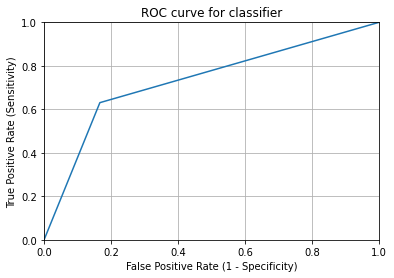

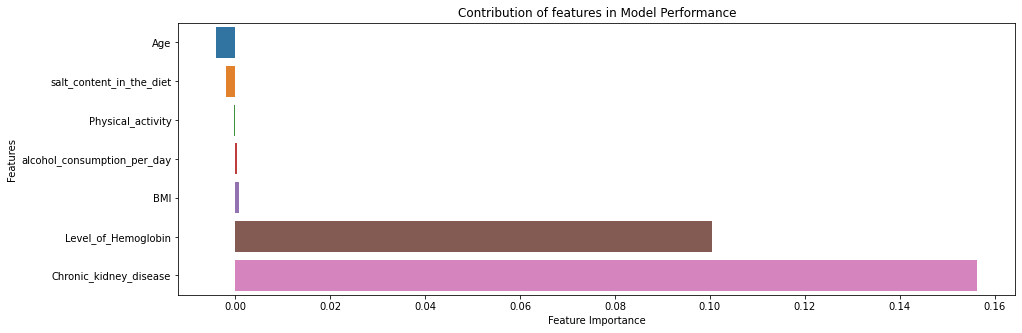

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = NB.score(testX, testy)
print("Accuracy of Naive Bayes:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print('------------------------------------')

print(classification_report(testy,y_pred))

miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


perm_importance = permutation_importance(rf, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Gradient Boosting Classifier (After Lasso)

[0.77142857 0.70714286 0.75714286 0.71428571 0.77857143 0.76428571
 0.77857143 0.75714286 0.67857143 0.73571429]
Accuracy of Gradient Boosting KFold with k=10: 74.43%
[[548 171]
 [174 507]]


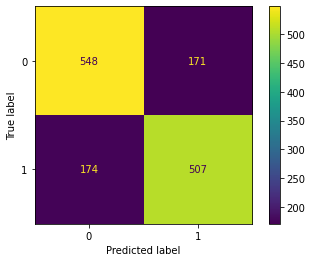

In [81]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
results_kfold = cross_val_score(gb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Gradient Boosting KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(gb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [82]:
gb = GradientBoostingClassifier(n_estimators=150,max_depth = 2)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

Confusion Matrix:
[[215  79]
 [ 68 238]]
------------------------------------
AUC Score: 0.7545351473922903
------------------------------------
Accuracy of Gradient Boosting: 75.5 %
------------------------------------
Recall: 0.7777777777777778
------------------------------------
Precision: 0.750788643533123
------------------------------------
Specificity: 0.7312925170068028
------------------------------------
Sensitivity: 0.7777777777777778
------------------------------------
Miss Rate (False Positive Rate): 0.2687074829931973
------------------------------------
Miss Rate (False Negative Rate): 0.2222222222222222
------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       294
           1       0.75      0.78      0.76       306

    accuracy                           0.76       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.76      0.76      0.75       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

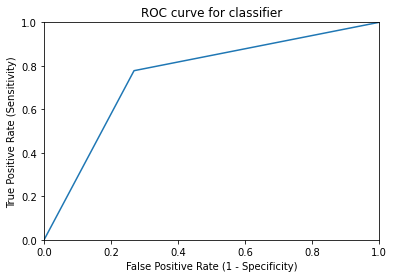

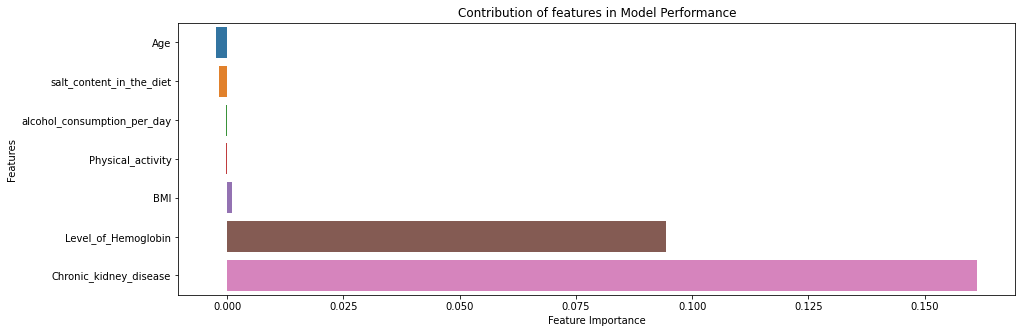

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX, testy)
print("Accuracy of Gradient Boosting:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print('------------------------------------')

print(classification_report(testy,y_pred))

miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')


perm_importance = permutation_importance(rf, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Voting Classifier (After Lasso)

In [84]:
r0 = GradientBoostingClassifier(learning_rate = 0.01,max_depth=5,n_estimators=400)
r1 = RandomForestClassifier(max_depth=10,n_estimators = 1200)
r2 = XGBClassifier(learning_rate = 0.85, max_depth = 2)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

Confusion Matrix:
[[219  75]
 [ 74 232]]
------------------------------------
AUC Score: 0.7515339469120983
------------------------------------
Accuracy of Voting Classifier: 75.16666666666667 %
------------------------------------
Recall: 0.7581699346405228
------------------------------------
Precision: 0.755700325732899
------------------------------------
Specificity: 0.7448979591836735
------------------------------------
Sensitivity: 0.7581699346405228
------------------------------------
Miss Rate (False Positive Rate): 0.25510204081632654
------------------------------------
Miss Rate (False Negative Rate): 0.24183006535947713
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       294
           1       0.75      0.78      0.76       306

    accuracy                           0.76       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.76      0.76      0.75       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

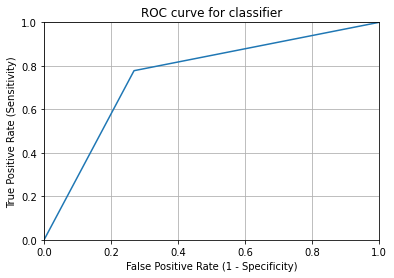

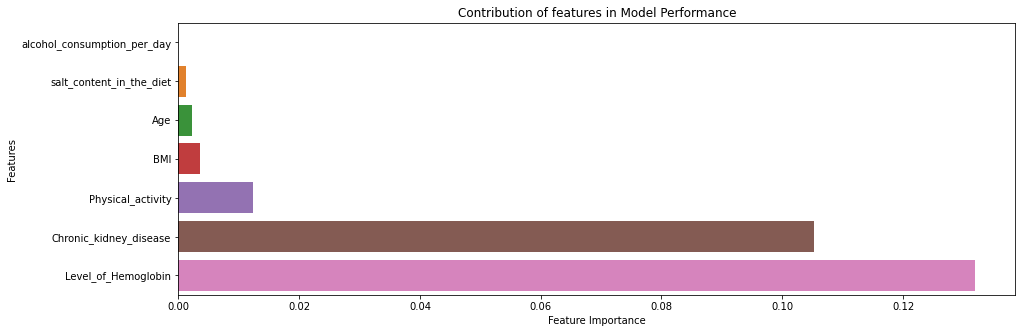

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred_voting)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred_voting)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred_voting)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred_voting)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(voting, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

## Feature Selection Using Recursive Feature Selection (RFE)

In [86]:
X = data.loc[:, data.columns != 'Blood_Pressure_Abnormality']
y = data[['Blood_Pressure_Abnormality']]

In [87]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

In [88]:
rf_w = RandomForestClassifier(random_state=100, n_estimators=50)
rf_w.fit(trainX, trainy)

RandomForestClassifier(n_estimators=50, random_state=100)

<AxesSubplot:xlabel='Features', ylabel='Importances'>

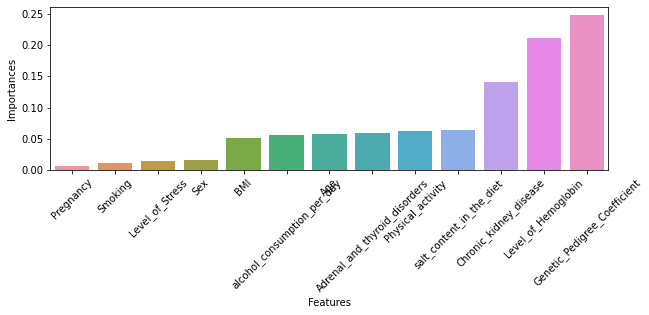

In [89]:
import seaborn as sns
# get the importance of the resulting features.
importances = rf_w.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": trainX.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=final_df)

In [90]:
model_tree = RandomForestClassifier(n_estimators=100,random_state=42)

# use RFE to eleminate the less importance features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=9, step=1)    # Selecting 9 imporatant Features.
X_train_rfe_tree = sel_rfe_tree.fit_transform(trainX, trainy)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)

[ True  True  True  True False False False  True  True  True False  True
  True]
[1 1 1 1 2 5 4 1 1 1 3 1 1]


In [91]:
# These are the important features after RFE.
selected_cols = [column for column in trainX.columns if column in trainX.columns[sel_rfe_tree.get_support()]]
selected_cols

['Level_of_Hemoglobin',
 'Genetic_Pedigree_Coefficient',
 'Age',
 'BMI',
 'Physical_activity',
 'salt_content_in_the_diet',
 'alcohol_consumption_per_day',
 'Chronic_kidney_disease',
 'Adrenal_and_thyroid_disorders']

## Applying Machine Learning Models after Recursive Feature Selection

In [92]:
#Adding all imporatant features after RFE in X variable.
X = data[['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient','Age','Physical_activity','salt_content_in_the_diet','alcohol_consumption_per_day','Chronic_kidney_disease','Adrenal_and_thyroid_disorders','BMI']]
y = data[['Blood_Pressure_Abnormality']]              # Target Variable.

In [93]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(1400, 9)
(1400, 1)
(600, 9)
(600, 1)


In [94]:
features = trainX.columns
print(features)

Index(['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age',
       'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Chronic_kidney_disease',
       'Adrenal_and_thyroid_disorders', 'BMI'],
      dtype='object')


### Logistic Regression (After RFE)

[0.75       0.70714286 0.75       0.72142857 0.66428571 0.74285714
 0.78571429 0.69285714 0.69285714 0.68571429]
Accuracy Logistic Regression KFold with k=10: 71.93%
[[518 201]
 [197 484]]


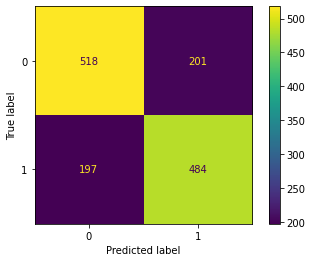

In [95]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

lr = LogisticRegression(solver='liblinear',random_state=2)
results_kfold = cross_val_score(lr, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy Logistic Regression KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(lr, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [96]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(trainX,trainy.values.ravel())
y_pred = lr.predict(testX)

Confusion Matrix:
[[205  89]
 [102 204]]
------------------------------------
AUC Score: 0.6819727891156463
------------------------------------
Accuracy of Logistic Regression: 68.16666666666666 %
------------------------------------
Recall: 0.6666666666666666
------------------------------------
Precision: 0.6962457337883959
------------------------------------
Specificity: 0.6972789115646258
------------------------------------
Sensitivity: 0.6666666666666666
------------------------------------
Miss Rate (False Positive Rate): 0.30272108843537415
------------------------------------
Miss Rate (False Negative Rate): 0.3333333333333333
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       294
           1       0.70      0.67      0.68       306

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.68      0.68      0.68       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

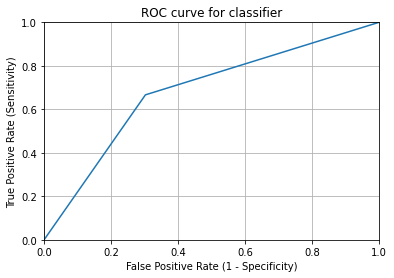

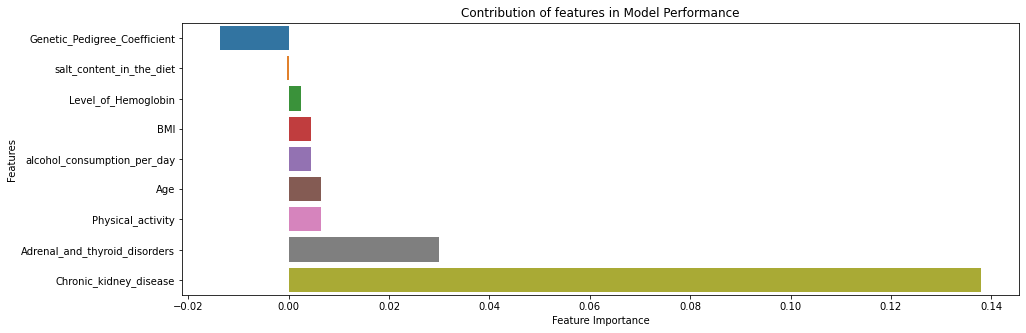

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = lr.score(testX, testy)
print("Accuracy of Logistic Regression:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


perm_importance = permutation_importance(lr, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### XGBOOST Classifier (After RFE)

[0.90714286 0.86428571 0.85714286 0.88571429 0.89285714 0.88571429
 0.88571429 0.88571429 0.84285714 0.92142857]
Accuracy of XGBOOST KFold with k=10: 88.29%
[[617 102]
 [ 85 596]]


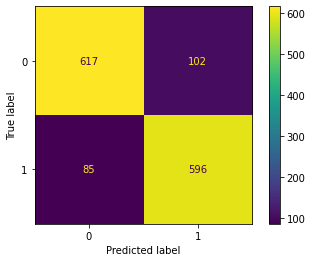

In [98]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)
results_kfold = cross_val_score(xgb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of XGBOOST KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(xgb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [99]:
xgb = XGBClassifier(max_depth = 8, learning_rate = 0.1)
xgb.fit(trainX,trainy.values.ravel())
y_pred = xgb.predict(testX)

Confusion Matrix:
[[275  19]
 [ 36 270]]
------------------------------------
AUC Score: 0.9088635454181674
------------------------------------
Accuracy of XGBOOST: 90.83333333333333 %
------------------------------------
Recall: 0.8823529411764706
------------------------------------
Precision: 0.9342560553633218
------------------------------------
Specificity: 0.935374149659864
------------------------------------
Sensitivity: 0.8823529411764706
------------------------------------
Miss Rate (False Positive Rate): 0.06462585034013606
------------------------------------
Miss Rate (False Negative Rate): 0.11764705882352941
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       294
           1       0.93      0.88      0.91       306

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

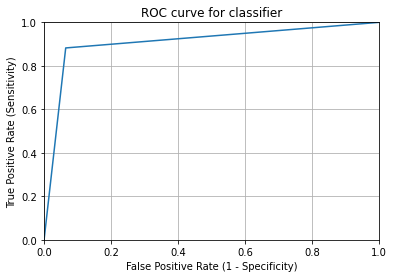

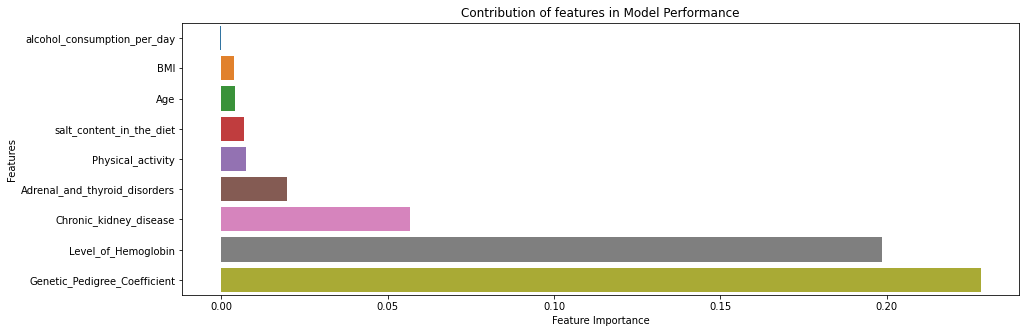

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = xgb.score(testX, testy)
print("Accuracy of XGBOOST:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


print(classification_report(testy,y_pred))


miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


perm_importance = permutation_importance(xgb, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Decision Tree Classifier (After RFE)

[0.79285714 0.77857143 0.84285714 0.78571429 0.82857143 0.79285714
 0.85714286 0.83571429 0.81428571 0.84285714]
Accuracy of DECISION TREE KFold with k=10: 81.71%
[[604 115]
 [109 572]]


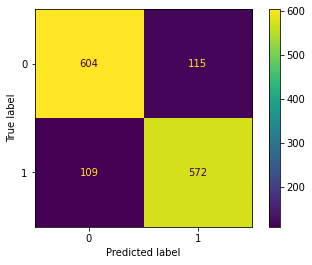

In [101]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

DT = DecisionTreeClassifier(max_depth=200)
results_kfold = cross_val_score(DT, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of DECISION TREE KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(DT, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [102]:
DT = DecisionTreeClassifier(max_depth=200)
DT.fit(trainX,trainy)
y_pred = DT.predict(testX) 

Confusion Matrix:
[[251  43]
 [ 51 255]]
------------------------------------
AUC Score: 0.8435374149659864
------------------------------------
Accuracy of Decision Tree: 84.33333333333334 %
------------------------------------
Recall: 0.8333333333333334
------------------------------------
Precision: 0.8557046979865772
------------------------------------
Specificity: 0.8537414965986394
------------------------------------
Sensitivity: 0.8333333333333334
------------------------------------
Miss Rate (False Positive Rate): 0.14625850340136054
------------------------------------
Miss Rate (False Negative Rate): 0.16666666666666666
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       294
           1       0.86      0.83      0.84       306

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

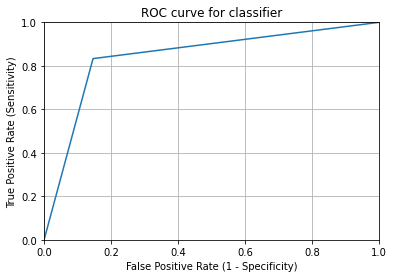

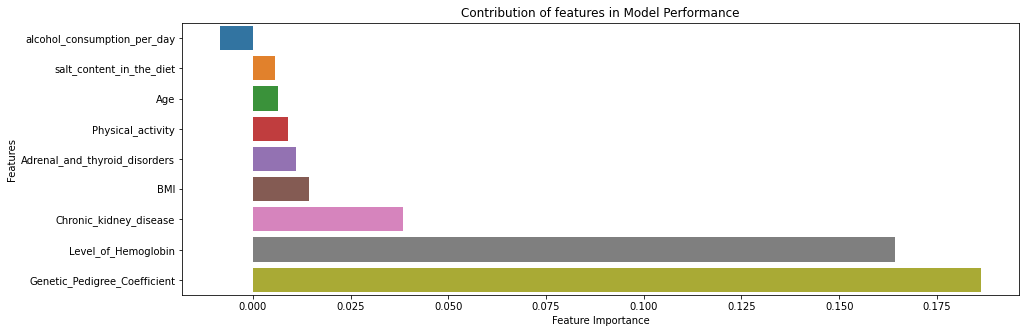

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


print(classification_report(testy,y_pred))

miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


perm_importance = permutation_importance(DT, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### KNN Classifier (After RFE)

In [104]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(trainX,trainy.values.ravel())
y_pred = knn.predict(testX)

Confusion Matrix:
[[163 131]
 [176 130]]
------------------------------------
AUC Score: 0.4896291850073363
------------------------------------
Accuracy of KNN Classifier: 48.833333333333336 %
------------------------------------
Recall: 0.42483660130718953
------------------------------------
Precision: 0.49808429118773945
------------------------------------
Specificity: 0.5544217687074829
------------------------------------
Sensitivity: 0.42483660130718953
------------------------------------
Miss Rate (False Positive Rate): 0.445578231292517
------------------------------------
Miss Rate (False Negative Rate): 0.5751633986928104


Text(0.5, 1.0, 'Contribution of features in Model Performance')

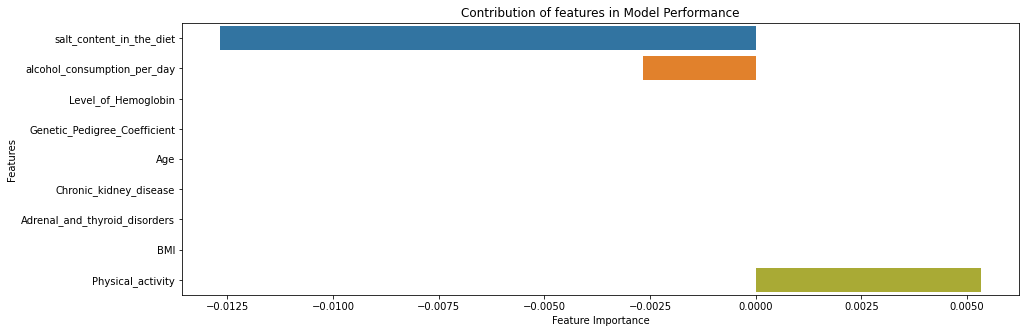

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = knn.score(testX, testy)
print("Accuracy of KNN Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

perm_importance = permutation_importance(knn, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Naive Bayes Classifier (After RFE)

[0.81428571 0.72857143 0.79285714 0.76428571 0.77142857 0.82142857
 0.82142857 0.83571429 0.71428571 0.77857143]
Accuracy of Naive Bayes KFold with k=10: 78.43%
[[628  91]
 [219 462]]


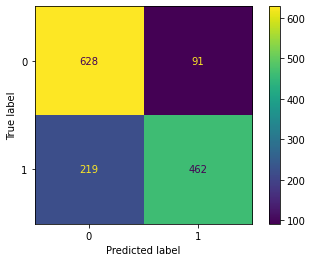

In [106]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

NB = GaussianNB()
results_kfold = cross_val_score(NB, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Naive Bayes KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(NB, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [107]:
NB = GaussianNB()
NB.fit(trainX,trainy.values.ravel())
y_pred = NB.predict(testX)

Confusion Matrix:
[[260  34]
 [110 196]]
------------------------------------
AUC Score: 0.7624383086567961
------------------------------------
Accuracy of Naive Bayes: 76.0 %
------------------------------------
Recall: 0.6405228758169934
------------------------------------
Precision: 0.8521739130434782
------------------------------------
Specificity: 0.8843537414965986
------------------------------------
Sensitivity: 0.6405228758169934
------------------------------------
Miss Rate (False Positive Rate): 0.11564625850340136
------------------------------------
Miss Rate (False Negative Rate): 0.35947712418300654


Text(0.5, 1.0, 'Contribution of features in Model Performance')

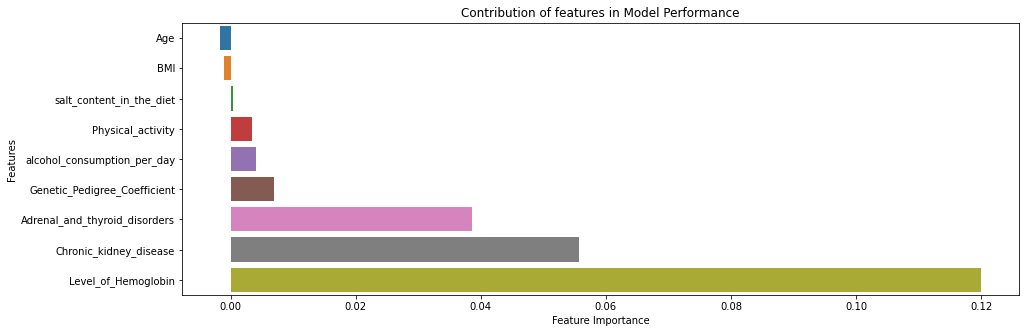

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = NB.score(testX, testy)
print("Accuracy of Naive Bayes:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

perm_importance = permutation_importance(NB, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Random Forest Classifier (After RFE)

[0.87857143 0.89285714 0.88571429 0.9        0.87857143 0.87857143
 0.9        0.9        0.81428571 0.93571429]
Accuracy of Random Forest KFold with k=10: 88.64%
[[617 102]
 [ 74 607]]


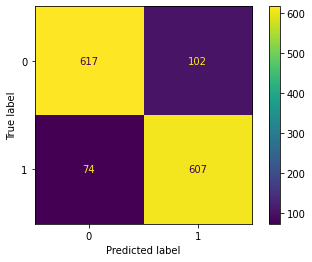

In [109]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
results_kfold = cross_val_score(rf, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Random Forest KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(rf, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [110]:
rf = RandomForestClassifier(max_depth=50,n_estimators = 150)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[269  25]
 [ 35 271]]
------------------------------------
AUC Score: 0.9002934507136188
------------------------------------
Accuracy of Random Forest: 90.0 %
------------------------------------
Recall: 0.8856209150326797
------------------------------------
Precision: 0.9155405405405406
------------------------------------
Specificity: 0.9149659863945578
------------------------------------
Sensitivity: 0.8856209150326797
------------------------------------
Miss Rate (False Positive Rate): 0.08503401360544217
------------------------------------
Miss Rate (False Negative Rate): 0.11437908496732026
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       294
           1       0.92      0.89      0.90       306

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

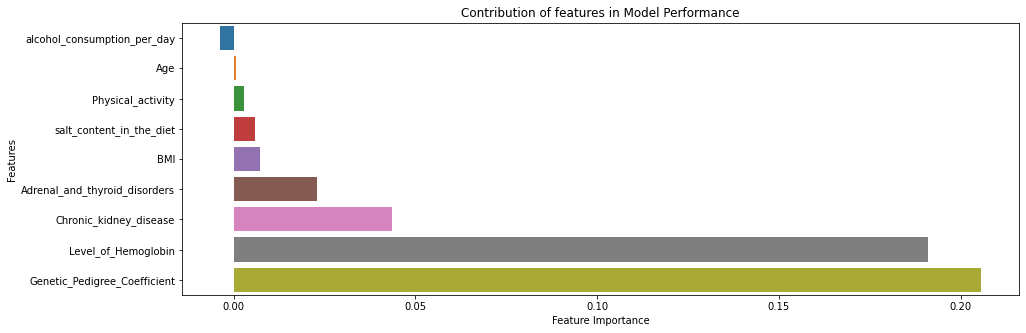

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

perm_importance = permutation_importance(rf, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Gradient Boosting Classifier (After RFE)

[0.88571429 0.9        0.87142857 0.88571429 0.86428571 0.87142857
 0.87857143 0.89285714 0.87857143 0.92142857]
Accuracy of Gradient Boosting KFold with k=10: 88.50%
[[634  85]
 [ 75 606]]


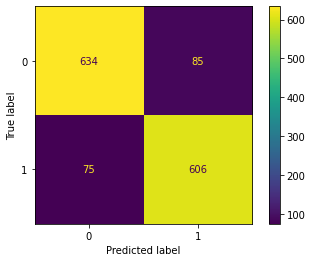

In [112]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
results_kfold = cross_val_score(gb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Gradient Boosting KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(gb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [113]:
gb = GradientBoostingClassifier(n_estimators=150,max_depth = 2)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

Confusion Matrix:
[[277  17]
 [ 40 266]]
------------------------------------
AUC Score: 0.9057289582499667
------------------------------------
Accuracy of Gradient Boosting Classifier: 90.5 %
------------------------------------
Recall: 0.869281045751634
------------------------------------
Precision: 0.9399293286219081
------------------------------------
Specificity: 0.9421768707482994
------------------------------------
Sensitivity: 0.869281045751634
------------------------------------
Miss Rate (False Positive Rate): 0.05782312925170068
------------------------------------
Miss Rate (False Negative Rate): 0.13071895424836602
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       294
           1       0.94      0.87      0.90       306

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.90       600
weighted avg       0.91      0.91      0.90       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

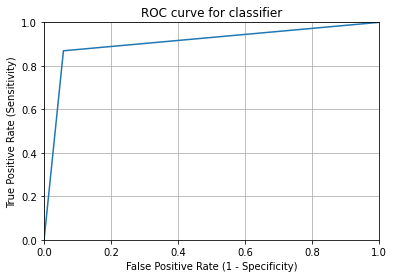

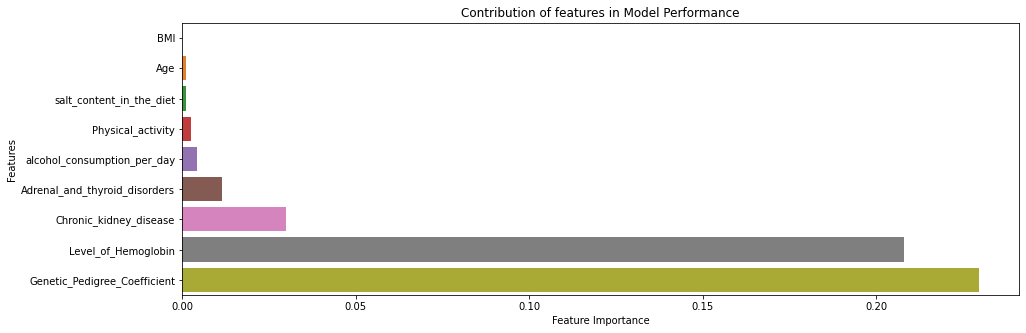

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX, testy)
print("Accuracy of Gradient Boosting Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(gb, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Voting Classifier (After RFE)

In [115]:
r0 = GradientBoostingClassifier(learning_rate = 0.01,max_depth=5,n_estimators=400)
r1 = RandomForestClassifier(max_depth=10,n_estimators = 1200)
r2 = XGBClassifier(learning_rate = 0.82, max_depth = 2)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

Confusion Matrix:
[[274  20]
 [ 36 270]]
------------------------------------
AUC Score: 0.9071628651460585
------------------------------------
Accuracy of Voting Classifier: 90.66666666666666 %
------------------------------------
Recall: 0.8823529411764706
------------------------------------
Precision: 0.9310344827586207
------------------------------------
Specificity: 0.9319727891156463
------------------------------------
Sensitivity: 0.8823529411764706
------------------------------------
Miss Rate (False Positive Rate): 0.06802721088435375
------------------------------------
Miss Rate (False Negative Rate): 0.11764705882352941
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       294
           1       0.94      0.87      0.90       306

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.90       600
weighted avg       0.91      0.91      0.90       600



Text(0.5, 1.0, 'Contribution of features in Model Performance')

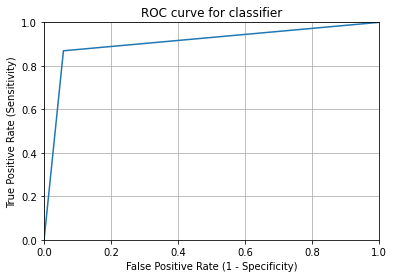

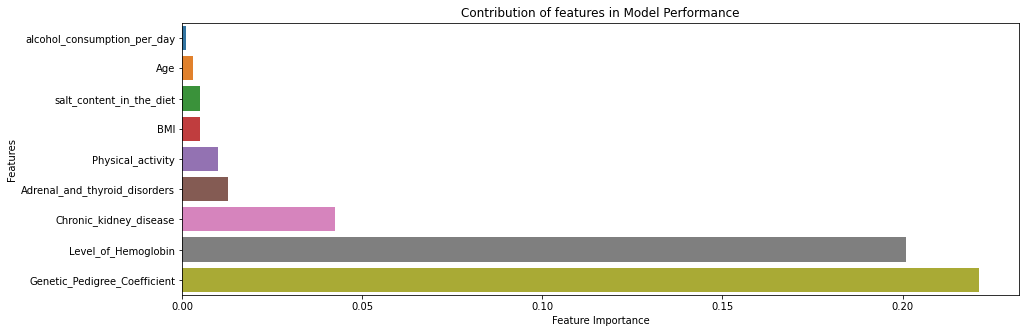

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred_voting)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred_voting)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred_voting)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred_voting)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


perm_importance = permutation_importance(voting, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

In [117]:
import pickle
pickle_out = open("E:/voting1.pkl","wb")
pickle.dump(voting, pickle_out)
pickle_out.close()

In [118]:
import pickle
pickle_out = open("E:/gb.pkl","wb")
pickle.dump(gb, pickle_out)
pickle_out.close()

In [119]:
import pickle
pickle_out = open("E:/rf1.pkl","wb")
pickle.dump(rf, pickle_out)
pickle_out.close()